# Cross validation for hyperparameters search

In this model we will optimize hyperparameters using different cross validation schemes

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import(
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    GridSearchCV,
    train_test_split,
)


In [2]:
#load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.value_counts()/len(y)

0    0.627417
1    0.372583
dtype: float64

In [5]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state= 0 )

X_train.shape, X_test.shape

((398, 30), (171, 30))

# K fold Cross Validation

In [11]:
#Logistic Regression
logit = LogisticRegression(
    penalty='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)

#hyperparameter space
param_grid = dict(
    penalty = ['l1','l2'],
    C = [0.1, 1, 10])

#K-Fold Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=4)

#search
clf = GridSearchCV(
    logit,
    param_grid,
    scoring = 'accuracy',
    cv = kf, 
    refit = True #refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

#best parameters
search.best_params_

{'C': 1, 'penalty': 'l2'}

We can also specify the parameter cv = 5 directly in the GridSearch function or we can set it up outside as we have done here. With **refit = True**, once the grid search evaluates all the hyperparameters and select the best model, it refits the best model to the entire dataset.

In [12]:
results = pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.919620,0.012606
1,"{'C': 0.1, 'penalty': 'l2'}",0.934747,0.019812
2,"{'C': 1, 'penalty': 'l1'}",0.944810,0.024360
3,"{'C': 1, 'penalty': 'l2'}",0.947310,0.026587
4,"{'C': 10, 'penalty': 'l1'}",0.947247,0.014592
5,"{'C': 10, 'penalty': 'l2'}",0.947278,0.014460


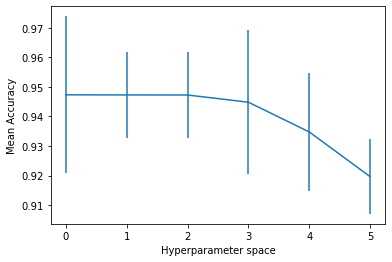

In [13]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space');

We can see that the best moel has high variance, but the second model leads almost the same results with less variance.

In [14]:
#let's get the prediction
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Test accuracy: ', accuracy_score(y_test, test_preds))

Train accuracy:  0.957286432160804
Test accuracy:  0.9649122807017544


We can see that the test score accuracy falls in the interval that we plotted before.

# Repetead k fold

In [15]:
#Logistic Regression
logit = LogisticRegression(
    penalty='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)

#hyperparameter space
param_grid = dict(
    penalty = ['l1','l2'],
    C = [0.1, 1, 10])

#Repeated K-fold cross validation
rkf = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=4
)

#search
clf = GridSearchCV(
    logit,
    param_grid,
    scoring = 'accuracy',
    cv = rkf, 
    refit = True #refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

#best parameters
search.best_params_

{'C': 10, 'penalty': 'l1'}

In [16]:
results = pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.922820,0.022496
1,"{'C': 0.1, 'penalty': 'l2'}",0.932642,0.022080
2,"{'C': 1, 'penalty': 'l1'}",0.948497,0.021488
3,"{'C': 1, 'penalty': 'l2'}",0.945975,0.023089
4,"{'C': 10, 'penalty': 'l1'}",0.955025,0.023470
5,"{'C': 10, 'penalty': 'l2'}",0.951509,0.022780


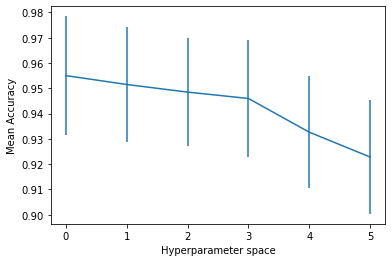

In [17]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space');

In [18]:
#let's get the prediction
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Test accuracy: ', accuracy_score(y_test, test_preds))

Train accuracy:  0.9748743718592965
Test accuracy:  0.9707602339181286


# Leave one out

In [19]:
#Logistic Regression
logit = LogisticRegression(
    penalty='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)

#hyperparameter space
param_grid = dict(
    penalty = ['l1','l2'],
    C = [0.1, 1, 10])

#leave one out
loo = LeaveOneOut()

#search
clf = GridSearchCV(
    logit,
    param_grid,
    scoring = 'accuracy',
    cv = loo, 
    refit = True #refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

#best parameters
search.best_params_

{'C': 10, 'penalty': 'l1'}

In [20]:
results = pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.927136,0.259914
1,"{'C': 0.1, 'penalty': 'l2'}",0.934673,0.247101
2,"{'C': 1, 'penalty': 'l1'}",0.949749,0.218463
3,"{'C': 1, 'penalty': 'l2'}",0.944724,0.228519
4,"{'C': 10, 'penalty': 'l1'}",0.959799,0.196430
5,"{'C': 10, 'penalty': 'l2'}",0.954774,0.207800


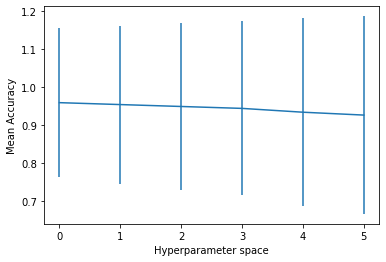

In [21]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space');

In [22]:
#let's get the prediction
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Test accuracy: ', accuracy_score(y_test, test_preds))

Train accuracy:  0.9748743718592965
Test accuracy:  0.9707602339181286


# Leave P out cross validation

In [23]:
#Logistic Regression
logit = LogisticRegression(
    penalty='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)

#hyperparameter space
param_grid = dict(
    penalty = ['l1','l2'],
    C = [0.1, 1, 10])

#leave p out
lpo=LeavePOut(p=2)

X_train_small = X_train.head(30)
y_train_small = y_train.head(30)

#search
clf = GridSearchCV(
    logit,
    param_grid,
    scoring = 'accuracy',
    cv = loo, 
    refit = True #refits best model to entire dataset
)

search = clf.fit(X_train_small, y_train_small)

#best parameters
search.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [24]:
results = pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.900000,0.300000
1,"{'C': 0.1, 'penalty': 'l2'}",0.900000,0.300000
2,"{'C': 1, 'penalty': 'l1'}",0.866667,0.339935
3,"{'C': 1, 'penalty': 'l2'}",0.866667,0.339935
4,"{'C': 10, 'penalty': 'l1'}",0.866667,0.339935
5,"{'C': 10, 'penalty': 'l2'}",0.866667,0.339935


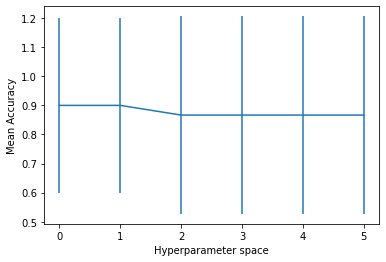

In [25]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space');

In [29]:
#let's get the prediction
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Test accuracy: ', accuracy_score(y_test, test_preds))

Train accuracy:  0.9597989949748744
Test accuracy:  0.9649122807017544


# Stratified K fold

In [26]:
#Logistic Regression
logit = LogisticRegression(
    penalty='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)

#hyperparameter space
param_grid = dict(
    penalty = ['l1','l2'],
    C = [0.1, 1, 10])

#Repeated K-fold cross validation
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=4
)

#search
clf = GridSearchCV(
    logit,
    param_grid,
    scoring = 'accuracy',
    cv = skf, 
    refit = True #refits best model to entire dataset
)

search = clf.fit(X_train, y_train)

#best parameters
search.best_params_

{'C': 1, 'penalty': 'l1'}

In [27]:
results = pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
print(results.shape)
results

(6, 3)


,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.927025,0.020516
1,"{'C': 0.1, 'penalty': 'l2'}",0.926994,0.027246
2,"{'C': 1, 'penalty': 'l1'}",0.949652,0.026659
3,"{'C': 1, 'penalty': 'l2'}",0.944620,0.023649
4,"{'C': 10, 'penalty': 'l1'}",0.947184,0.021802
5,"{'C': 10, 'penalty': 'l2'}",0.949652,0.021315


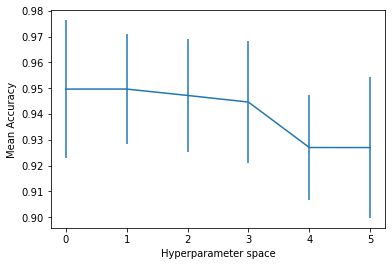

In [28]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space');

In [30]:
#let's get the prediction
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Test accuracy: ', accuracy_score(y_test, test_preds))

Train accuracy:  0.9597989949748744
Test accuracy:  0.9649122807017544
